In [81]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [82]:
df = pd.read_csv('Mall_Customers.csv')

In [83]:
cols = ['Annual Income (k$)','Spending Score (1-100)']

# Use pd.get_dummies to create dummy variables for the specified columns
dummies = pd.get_dummies(df[cols])

# Concatenate the dummies with the original dfFrame
df = pd.concat([df, dummies], axis='columns')

# Drop the original columns since they are no longer needed
df.drop(columns=cols, inplace=True)

print(df)

    CustomerID   Genre  Age  Annual Income (k$)_eighteen  \
0            1    Male   19                        False   
1            2    Male   21                        False   
2            3  Female   20                        False   
3            4  Female   23                        False   
4            5  Female   31                        False   
5            6  Female   22                        False   
6            7  Female   35                         True   
7            8  Female   23                         True   
8            9    Male   64                        False   
9           10  Female   30                        False   
10          11    Male   67                        False   
11          12  Female   35                        False   
12          13  Female   58                        False   
13          14  Female   24                        False   

    Annual Income (k$)_fifteen  Annual Income (k$)_nineteen  \
0                         True      

In [84]:
df.head(10)

,CustomerID,Genre,Age,Annual Income (k$)_eighteen,Annual Income (k$)_fifteen,Annual Income (k$)_nineteen,Annual Income (k$)_seventeen,Annual Income (k$)_sixteen,Annual Income (k$)_twenty,Spending Score (1-100)_eightone,...,Spending Score (1-100)_forteen,Spending Score (1-100)_forty,Spending Score (1-100)_ninefor,Spending Score (1-100)_ninenine,Spending Score (1-100)_sevenseven,Spending Score (1-100)_sevensix,Spending Score (1-100)_seventwo,Spending Score (1-100)_six,Spending Score (1-100)_thirtynine,Spending Score (1-100)_tree
0,1,Male,19,False,True,False,False,False,False,False,...,False,False,False,False,False,False,False,False,True,False
1,2,Male,21,False,True,False,False,False,False,True,...,False,False,False,False,False,False,False,False,False,False
2,3,Female,20,False,False,False,False,True,False,False,...,False,False,False,False,False,False,False,True,False,False
3,4,Female,23,False,False,False,False,True,False,False,...,False,False,False,False,True,False,False,False,False,False
4,5,Female,31,False,False,False,True,False,False,False,...,False,True,False,False,False,False,False,False,False,False
5,6,Female,22,False,False,False,True,False,False,False,...,False,False,False,False,False,True,False,False,False,False
6,7,Female,35,True,False,False,False,False,False,False,...,False,False,False,False,False,False,False,True,False,False
7,8,Female,23,True,False,False,False,False,False,False,...,False,False,True,False,False,False,False,False,False,False
8,9,Male,64,False,False,True,False,False,False,False,...,False,False,False,False,False,False,False,False,False,True
9,10,Female,30,False,False,True,False,False,False,False,...,False,False,False,False,False,False,True,False,False,False


In [85]:
df.shape

(14, 21)

In [86]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14 entries, 0 to 13
Data columns (total 21 columns):
 #   Column                             Non-Null Count  Dtype 
---  ------                             --------------  ----- 
 0   CustomerID                         14 non-null     int64 
 1   Genre                              14 non-null     object
 2   Age                                14 non-null     int64 
 3   Annual Income (k$)_eighteen        14 non-null     bool  
 4   Annual Income (k$)_fifteen         14 non-null     bool  
 5   Annual Income (k$)_nineteen        14 non-null     bool  
 6   Annual Income (k$)_seventeen       14 non-null     bool  
 7   Annual Income (k$)_sixteen         14 non-null     bool  
 8   Annual Income (k$)_twenty          14 non-null     bool  
 9   Spending Score (1-100)_eightone    14 non-null     bool  
 10  Spending Score (1-100)_fifteen     14 non-null     bool  
 11  Spending Score (1-100)_forteen     14 non-null     bool  
 12  Spending S

In [87]:
x = df.iloc[:, [3,4]].values

In [88]:
x

array([[False,  True],
       [False,  True],
       [False, False],
       [False, False],
       [False, False],
       [False, False],
       [ True, False],
       [ True, False],
       [False, False],
       [False, False],
       [False, False],
       [False, False],
       [False, False],
       [False, False]])

In [89]:
from sklearn.cluster import KMeans
wcss = []

In [90]:
for i in range(1, 11):
    kmeans = KMeans(n_clusters= i, init='k-means++', random_state=0)
    kmeans.fit(x)
    wcss.append(kmeans.inertia_)

/home/francis/.local/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/home/francis/.local/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/home/francis/.local/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/home/francis/.local/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'au

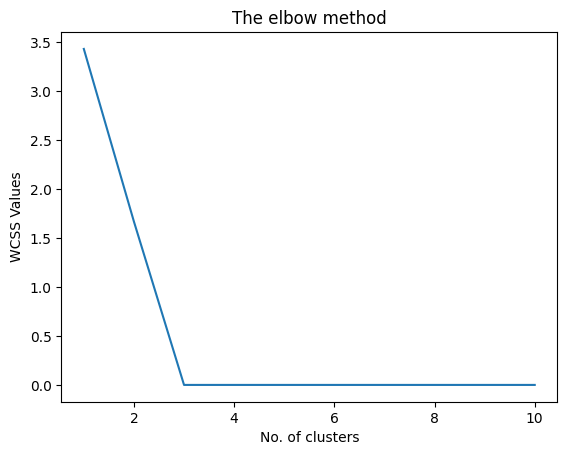

In [91]:
plt.plot(range(1,11), wcss)
plt.title('The elbow method')
plt.xlabel('No. of clusters')
plt.ylabel('WCSS Values')
plt.show()

In [92]:
kmeansmodel = KMeans(n_clusters= 5, init='k-means++', random_state=0)

In [93]:
y_kmeans = kmeansmodel.fit_predict(x)

/home/francis/.local/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/home/francis/.local/lib/python3.10/site-packages/sklearn/base.py:1151: ConvergenceWarning: Number of distinct clusters (3) found smaller than n_clusters (5). Possibly due to duplicate points in X.
  return fit_method(estimator, *args, **kwargs)


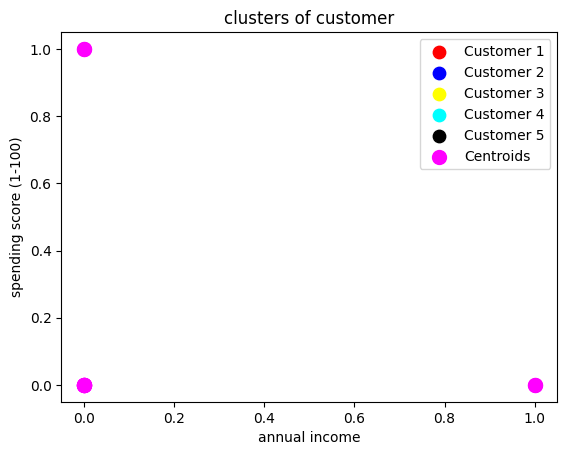

In [94]:
plt.scatter(x[y_kmeans == 0,0], x[y_kmeans == 0,1], s= 80, c= "red", label = 'Customer 1')
plt.scatter(x[y_kmeans == 1,0], x[y_kmeans == 1,1], s= 80, c= "blue", label = 'Customer 2')
plt.scatter(x[y_kmeans == 2,0], x[y_kmeans == 2,1], s= 80, c= "yellow", label = 'Customer 3')
plt.scatter(x[y_kmeans == 3,0], x[y_kmeans == 3,1], s= 80, c= "cyan", label = 'Customer 4')
plt.scatter(x[y_kmeans == 4,0], x[y_kmeans == 4,1], s= 80, c= "black", label = 'Customer 5')
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], s= 100, c= 'magenta', label = 'Centroids')
plt.title('clusters of customer')
plt.xlabel('annual income')
plt.ylabel('spending score (1-100)')
plt.legend()
plt.show()